In [ ]:
#Company wants to automate the loan eligibility process (real time) based on customer detail provided 
#while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, 
#Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify 
#the customers segments, those are eligible for loan amount so that they can specifically target these customers.

In [82]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=8,4
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [83]:
#Import data
loan = pd.read_csv('train_ctrUa4K.csv')

In [84]:
print(loan.shape)

(614, 13)


In [85]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [86]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [88]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [89]:
#Check the unique values per column of categorical data ('object'), or those that perhaps should be converted to categorical
loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [90]:
loan['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [91]:
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [92]:
loan['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [93]:
loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [94]:
loan['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [95]:
loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [96]:
loan['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [97]:
#Plotting of variables against the dependent variable (Y/N to getting a loan)
#Distribution analysis = continuous variables - box-whisker plots, histograms
  #Applicant income
#Categorical value analysis = bar graph of counts
  #Gender, Married, Dependents, Education, Self_Employed   

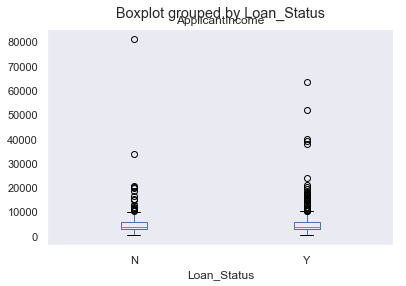

In [98]:
loan.boxplot(column = 'ApplicantIncome', grid =False, by = 'Loan_Status')

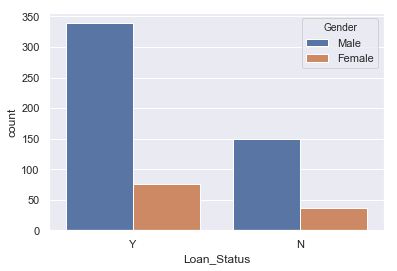

In [99]:
sns.countplot(x="Loan_Status", hue="Gender", data=loan)

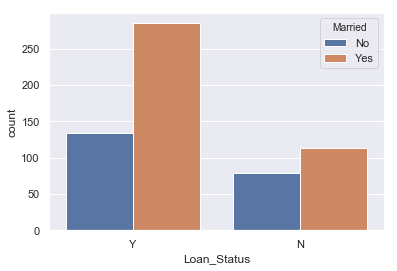

In [100]:
sns.countplot(x="Loan_Status", hue="Married", data=loan)

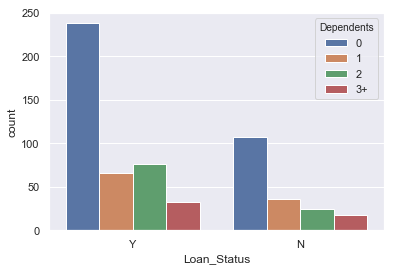

In [101]:
sns.countplot(x="Loan_Status", hue="Dependents", data=loan)

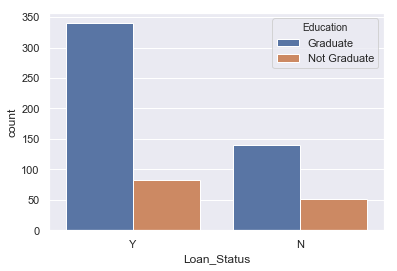

In [102]:
sns.countplot(x="Loan_Status", hue="Education", data=loan)

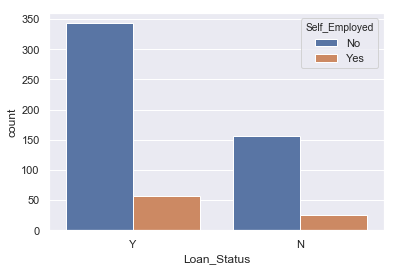

In [103]:
sns.countplot(x="Loan_Status", hue="Self_Employed", data=loan)

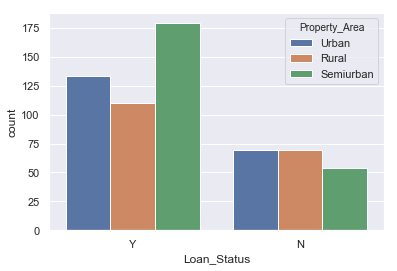

In [104]:
sns.countplot(x="Loan_Status", hue="Property_Area", data=loan)

In [105]:
#Changing data type of 'Credit_History' column from float/number to object/categorical
loan['Credit_History'] = loan['Credit_History'].astype('str')

In [106]:
loan['Credit_History'].describe()

count     614
unique      3
top       1.0
freq      475
Name: Credit_History, dtype: object

In [107]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
print(loan.shape)
print(loan.dropna().shape)

(614, 13)
(523, 13)


Since there are many rows with blank values and the database is small, replace the blank values with the mode (categorical variables) or the median (continuous variables)

In [109]:
#Continuous replacement of zeroes
loan['LoanAmount'].fillna(128,inplace=True)

In [110]:
loan['LoanAmount'].fillna(128,inplace=True)

In [111]:
#Categorical replacement of zeroes
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)

loan['Self_Employed'].fillna('No',inplace=True)

In [112]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [113]:
#Remove + sign from Dependents field
loan['Dependents'] = loan['Dependents'].str.replace("+", "")

In [114]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [129]:
#Libraries for model prediction
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [116]:
#Encode the categorical variables for the model
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed', 'Credit_History','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    loan[i] = le.fit_transform(loan[i])
loan.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


In [117]:
#Remove Loan_ID column
loan = loan.drop(['Loan_ID'], 1)
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [118]:
#Split the database into train and test
x = loan.iloc[:, :-1].values #columns start to second last
y = loan.iloc[:, -1].values #last column

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state =7)
#80% used to train the model and 20% held back for validation testing
#In testing environment, keep random_state = some_number

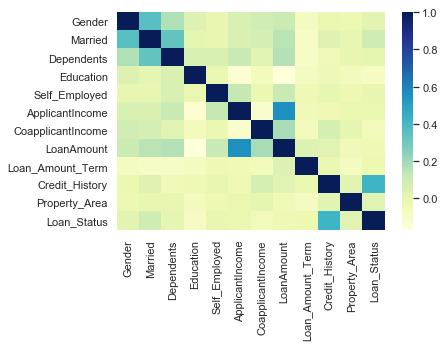

In [119]:
#Correlation Matrix to check Multi-collinearity (one predicator has linear relationship with another). 
#Undermines the statistical significance of an independent variable.
#After looking at correlation matrix and heatmap we can conclude that there is no multicollinearity. 
#So we are good to build our model

sns.heatmap(loan.corr(), cmap='YlGnBu')

In [136]:
#Test Logistic Regression, Decision tree, Random forest models. KNeighbours, SVC, linear

modelLR = LogisticRegression()
modelLR.fit(x_train,y_train)
predictions = modelLR.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8292682926829268


In [121]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7154471544715447


In [122]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8211382113821138


In [125]:
model = LinearDiscriminantAnalysis()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8292682926829268


In [126]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6097560975609756


In [127]:
model = SVC()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6829268292682927


In [130]:
model = GaussianNB()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8211382113821138


In [138]:
#Save the model
from sklearn.externals import joblib

modelfinal = modelLR
filename = 'finalized_model.sav'
joblib.dump(modelfinal, filename)


['finalized_model.sav']

In [139]:
#Run the model on the test file (wasn't used previously to create the model)
filename = 'finalized_model.sav'

#from sklearn.externals import joblib
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)
#Accuracy score

0.8292682926829268


In [143]:
#Import test data of 3 examples
test = pd.read_csv('test_Copy.csv')

In [144]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban


In [145]:
test.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,3.0,3.000000,3.000000,3.000000,3.0,3.0
mean,1.0,4598.666667,1100.000000,148.000000,360.0,1.0
std,1.0,1366.925504,964.365076,52.573758,0.0,0.0
min,0.0,3076.000000,0.000000,110.000000,360.0,1.0
25%,0.5,4038.000000,750.000000,118.000000,360.0,1.0
50%,1.0,5000.000000,1500.000000,126.000000,360.0,1.0
75%,1.5,5360.000000,1650.000000,167.000000,360.0,1.0
max,2.0,5720.000000,1800.000000,208.000000,360.0,1.0


In [146]:
#Changing data type of 'Credit_History' column from float/number to object/categorical
test['Credit_History'] = test['Credit_History'].astype('str')
test['Dependents'] = test['Dependents'].astype('str')

In [147]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 11 columns):
Gender               3 non-null object
Married              3 non-null object
Dependents           3 non-null object
Education            3 non-null object
Self_Employed        3 non-null object
ApplicantIncome      3 non-null int64
CoapplicantIncome    3 non-null int64
LoanAmount           3 non-null int64
Loan_Amount_Term     3 non-null int64
Credit_History       3 non-null object
Property_Area        3 non-null object
dtypes: int64(4), object(7)
memory usage: 344.0+ bytes


In [148]:
#X-values
testx = test.iloc[:, :].values #all columns

In [152]:
#Encode the categorical variables for the model
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed', 'Credit_History','Property_Area']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])


In [153]:
#The probability of a Yes result and a No result (Y response variable) for each X input

#print(loaded_model.coef_)
#print(loaded_model.intercept_)

y_pred = loaded_model.predict(test)
y_pred
#confusion_matrix(y_test, y_pred)
loaded_model.predict_proba(test)

array([[0.72325203, 0.27674797],
       [0.73174324, 0.26825676],
       [0.75440185, 0.24559815]])